In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./E:/KhaiPhaDuLieu/Me/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
letters = pd.read_csv('./data/letters_CG.csv')
letters = letters.drop('Unnamed: 17', axis = 1)
letters.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [3]:
# 
data = np.array(letters.iloc[:, :-1])
data

array([['C', 4, 10, ..., 1, 8, 4],
       ['C', 3, 5, ..., 1, 10, 2],
       ['G', 5, 10, ..., 2, 7, 5],
       ...,
       ['G', 5, 9, ..., 2, 9, 5],
       ['C', 6, 11, ..., 4, 9, 6],
       ['C', 5, 10, ..., 2, 11, 3]], dtype=object)

In [4]:
# Lấy thuộc tính phân loại
X= letters[['x-box','y-box','width','high','onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']]

X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [5]:
# Thuộc tính mục tiêu
y = letters['Class']

y.head()

0    C
1    C
2    G
3    C
4    G
Name: Class, dtype: object

In [6]:

exampleLetter = letters[(letters['Class'] == 'C') | (letters['Class'] == 'G')]

In [7]:
exampleLetter.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [8]:
# Chuyển đổi nhãn classs thành dạng số
exampleLetter['BinaryLabel'] = exampleLetter['Class'].replace(to_replace = ['C','G'], value=[1,-1])

In [9]:
# Xóa cột class
exampleLetter = exampleLetter.drop('Class', axis = 1)

In [10]:
# Bước 1
# gán trọng số cho các mẫu
exampleLetter['weight'] = 1/(exampleLetter.shape[0])

In [11]:
exampleLetter.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,BinaryLabel,weight
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,1,0.000663
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,1,0.000663
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,-1,0.000663
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,1,0.000663
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,-1,0.000663


In [12]:
# Lấy mẫu ngẫu nhiên
random.seed(10)
exampleLetter2 = exampleLetter.sample(len(exampleLetter), replace = True, weights = exampleLetter['weight'])
exampleLetter2

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,BinaryLabel,weight
396,4,5,6,4,5,7,8,5,3,7,7,8,7,11,7,8,-1,0.000663
120,1,3,2,2,1,6,7,5,5,9,7,10,2,8,4,10,-1,0.000663
446,3,7,4,5,3,7,6,7,7,7,4,11,1,8,5,11,-1,0.000663
1193,2,3,3,2,2,7,7,5,5,9,7,10,2,8,4,9,-1,0.000663
1226,2,5,3,3,2,6,8,7,7,8,8,13,1,9,4,10,1,0.000663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,6,10,6,8,5,7,6,6,5,10,7,13,4,8,6,7,-1,0.000663
1199,3,8,4,6,1,6,7,7,9,8,6,13,1,9,4,9,1,0.000663
259,5,4,6,6,2,6,7,7,11,7,6,14,1,8,4,9,1,0.000663
797,0,0,1,0,0,6,7,5,7,7,6,14,0,8,3,10,1,0.000663


In [13]:
# Lặp qua các thuộc tính phân loại và mục tiêu của tệp ngẫu nhiên
X_train = exampleLetter2.iloc[0:len(letters),0:15]
y_train = exampleLetter2.iloc[0:len(letters),16]

[Text(0.5, 0.75, 'X[11] <= 11.5\ngini = 0.499\nsamples = 1509\nvalue = [791, 718]'),
 Text(0.25, 0.25, 'gini = 0.386\nsamples = 972\nvalue = [718, 254]'),
 Text(0.75, 0.25, 'gini = 0.235\nsamples = 537\nvalue = [73, 464]')]

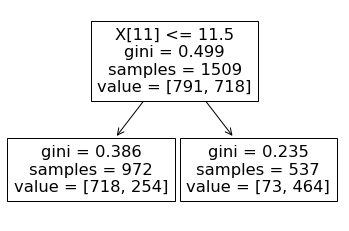

In [14]:
# Xây dựng cây quyết định một cấp
clfGini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clfGini.fit(X_train, y_train)
tree.plot_tree(clf)

In [15]:
#prediction
#Đưa test vào nên không lấy label
y_pred = clfGini.predict(exampleLetter.iloc[0:len(letters),0:15])
y_pred

array([ 1, -1, -1, ..., -1,  1, -1], dtype=int64)

In [16]:
#adding a column weight after the first round of boosting
# Thêm lớp dự đoán mới
exampleLetter['PredictionClass'] = y_pred
exampleLetter

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,BinaryLabel,weight,PredictionClass
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,1,0.000663,1
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,1,0.000663,-1
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,-1,0.000663,-1
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,1,0.000663,1
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,-1,0.000663,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9,1,0.000663,1
1505,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9,1,0.000663,-1
1506,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9,-1,0.000663,-1
1507,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6,1,0.000663,1


In [17]:
#misclassified = 0 if the label and prediction are same
#Phân biệt cây học yếu với cây học mạnh
exampleLetter.loc[exampleLetter.BinaryLabel != exampleLetter.PredictionClass, 'misclassification'] = 1
exampleLetter.loc[exampleLetter.BinaryLabel == exampleLetter.PredictionClass, 'misclassification'] = 0

In [18]:
#error calculation
# Tính tổng lỗi
error1 = sum(exampleLetter['misclassification'] * exampleLetter['weight'])
error1

0.22465208747514998

In [19]:
#calculation of alpha (performance)
#error không bao giờ vượt quá 1
# Tính hiệu suất performent trong quá trính train
alpha1 = 0.5*log((1-error1)/error1)
alpha1

0.6193794602056732

In [20]:
#update weight
newWeight = exampleLetter['weight']*np.exp(-1*alpha1*exampleLetter['BinaryLabel']*exampleLetter['PredictionClass'])

In [21]:
#normalized weight
# Trọng lượng bình thường
z = sum(newWeight)
normalizedWeight = newWeight/sum(newWeight)

In [22]:
#Update trọng số mới và tập dữ liệu
#4 là lấy 4 số sau dấu phẩy
exampleLetter['newWeight'] = round(normalizedWeight,4)
exampleLetter

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,xy2br,x-ege,xegvy,y-ege,yegvx,BinaryLabel,weight,PredictionClass,misclassification,newWeight
0,4,10,5,8,2,5,7,7,10,7,...,13,1,8,4,9,1,0.000663,1,0.0,0.0004
1,3,5,4,4,2,4,8,5,7,12,...,11,1,10,2,7,1,0.000663,-1,1.0,0.0015
2,5,10,6,7,3,8,7,8,8,6,...,9,2,7,5,10,-1,0.000663,-1,0.0,0.0004
3,5,9,6,7,4,3,8,6,7,12,...,13,1,9,3,7,1,0.000663,1,0.0,0.0004
4,4,8,5,6,3,6,6,7,6,10,...,12,2,9,4,9,-1,0.000663,1,1.0,0.0015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,12,2,10,4,9,1,0.000663,1,0.0,0.0004
1505,6,11,7,8,4,6,7,10,9,10,...,11,2,12,4,9,1,0.000663,-1,1.0,0.0015
1506,5,9,6,7,4,6,7,6,6,10,...,10,2,9,5,9,-1,0.000663,-1,0.0,0.0004
1507,6,11,7,8,5,5,8,7,6,8,...,15,4,9,6,6,1,0.000663,1,0.0,0.0004


In [23]:
#round 2
# Các lần lặp tiếp theo tương tự và tăng mẫu ngẫu nhiên weight 
random.seed(20)
exampleLetter2 = exampleLetter2.sample(len(exampleLetter), replace = True, weights = exampleLetter['newWeight'])
exampleLetter2 = exampleLetter2.iloc[:,0:16]
#Đưa vào train thì chỉ đưa 15 thuộc tính phân loại
X_train = exampleLetter2.iloc[0:len(letters),0:15]
#y_train chứa thuộc tính mục tiêu nằm ở 16 binarylabel
y_train = exampleLetter.iloc[0:len(letters),16]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#y_pred là dự đoán phân loại, predict đưa vào x test
y_pred = clf_gini.predict(exampleLetter.iloc[0:len(letters),0:15])
#adding a column pred2 after the second round of boosting
exampleLetter['PredictionClass_2'] = y_pred

[Text(0.5, 0.75, 'X[6] <= 9.5\ngini = 0.5\nsamples = 1509\nvalue = [773, 736]'),
 Text(0.25, 0.25, 'gini = 0.499\nsamples = 1466\nvalue = [764, 702]'),
 Text(0.75, 0.25, 'gini = 0.331\nsamples = 43\nvalue = [9, 34]')]

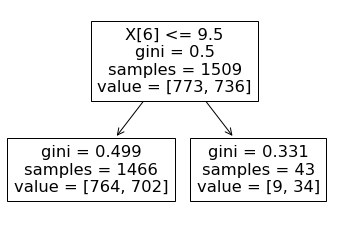

In [24]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [25]:
exampleLetter

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,x-ege,xegvy,y-ege,yegvx,BinaryLabel,weight,PredictionClass,misclassification,newWeight,PredictionClass_2
0,4,10,5,8,2,5,7,7,10,7,...,1,8,4,9,1,0.000663,1,0.0,0.0004,-1
1,3,5,4,4,2,4,8,5,7,12,...,1,10,2,7,1,0.000663,-1,1.0,0.0015,-1
2,5,10,6,7,3,8,7,8,8,6,...,2,7,5,10,-1,0.000663,-1,0.0,0.0004,-1
3,5,9,6,7,4,3,8,6,7,12,...,1,9,3,7,1,0.000663,1,0.0,0.0004,-1
4,4,8,5,6,3,6,6,7,6,10,...,2,9,4,9,-1,0.000663,1,1.0,0.0015,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,2,10,4,9,1,0.000663,1,0.0,0.0004,-1
1505,6,11,7,8,4,6,7,10,9,10,...,2,12,4,9,1,0.000663,-1,1.0,0.0015,-1
1506,5,9,6,7,4,6,7,6,6,10,...,2,9,5,9,-1,0.000663,-1,0.0,0.0004,-1
1507,6,11,7,8,5,5,8,7,6,8,...,4,9,6,6,1,0.000663,1,0.0,0.0004,-1


In [26]:
#misclassified = 0 if the label and prediction are same
#Phân biệt cây học yếu với cây học mạnh
exampleLetter.loc[exampleLetter.BinaryLabel != exampleLetter.PredictionClass_2, 'misclassification2'] = 1
exampleLetter.loc[exampleLetter.BinaryLabel == exampleLetter.PredictionClass_2, 'misclassification2'] = 0

In [27]:
#error calculation
error2 = sum(exampleLetter['misclassification2'] * exampleLetter['newWeight'])
error2

0.5687999999999999

In [28]:
#calculation of alpha (performance)
#error không bao giờ vượt quá 1
alpha2 = 0.5*log((1-error2)/error2)
alpha2

-0.13847842944712158

In [29]:
#update weight
newWeight_2 = exampleLetter['newWeight']*np.exp(-1*alpha2*exampleLetter['BinaryLabel']*exampleLetter['PredictionClass_2'])

In [30]:
#normalized weight
t = sum(newWeight_2)
normalizedWeight_2 = newWeight_2/sum(newWeight_2)

In [31]:
#Update trọng số mới và tập dữ liệu
#4 là lấy 4 số sau dấu phẩy
exampleLetter['newWeight_2'] = round(normalizedWeight_2,4)
exampleLetter

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,y-ege,yegvx,BinaryLabel,weight,PredictionClass,misclassification,newWeight,PredictionClass_2,misclassification2,newWeight_2
0,4,10,5,8,2,5,7,7,10,7,...,4,9,1,0.000663,1,0.0,0.0004,-1,1.0,0.0004
1,3,5,4,4,2,4,8,5,7,12,...,2,7,1,0.000663,-1,1.0,0.0015,-1,1.0,0.0014
2,5,10,6,7,3,8,7,8,8,6,...,5,10,-1,0.000663,-1,0.0,0.0004,-1,0.0,0.0005
3,5,9,6,7,4,3,8,6,7,12,...,3,7,1,0.000663,1,0.0,0.0004,-1,1.0,0.0004
4,4,8,5,6,3,6,6,7,6,10,...,4,9,-1,0.000663,1,1.0,0.0015,-1,0.0,0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,4,9,1,0.000663,1,0.0,0.0004,-1,1.0,0.0004
1505,6,11,7,8,4,6,7,10,9,10,...,4,9,1,0.000663,-1,1.0,0.0015,-1,1.0,0.0014
1506,5,9,6,7,4,6,7,6,6,10,...,5,9,-1,0.000663,-1,0.0,0.0004,-1,0.0,0.0005
1507,6,11,7,8,5,5,8,7,6,8,...,6,6,1,0.000663,1,0.0,0.0004,-1,1.0,0.0004


In [32]:
#round 3
random.seed(20)
exampleLetter3 = exampleLetter.sample(len(exampleLetter), replace = True, weights = exampleLetter['newWeight_2'])
exampleLetter3 = exampleLetter3.iloc[:,0:16]
#Đưa vào train thì chỉ đưa 15 thuộc tính phân loại
X_train = exampleLetter3.iloc[0:len(letters),0:15]
#y_train chứa thuộc tính mục tiêu nằm ở 16 binarylabel
y_train = exampleLetter.iloc[0:len(letters),16]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#y_pred là dự đoán phân loại, predict đưa vào x test
y_pred = clf_gini.predict(exampleLetter.iloc[0:len(letters),0:15])
#adding a column pred2 after the second round of boosting
exampleLetter['PredictionClass_3'] = y_pred

[Text(0.5, 0.75, 'X[7] <= 9.5\ngini = 0.5\nsamples = 1509\nvalue = [773, 736]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 1503\nvalue = [773, 730]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

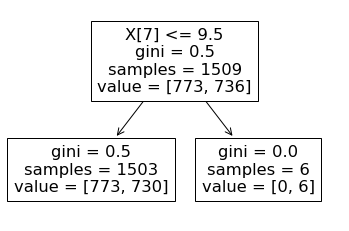

In [33]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [34]:
exampleLetter

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,yegvx,BinaryLabel,weight,PredictionClass,misclassification,newWeight,PredictionClass_2,misclassification2,newWeight_2,PredictionClass_3
0,4,10,5,8,2,5,7,7,10,7,...,9,1,0.000663,1,0.0,0.0004,-1,1.0,0.0004,-1
1,3,5,4,4,2,4,8,5,7,12,...,7,1,0.000663,-1,1.0,0.0015,-1,1.0,0.0014,-1
2,5,10,6,7,3,8,7,8,8,6,...,10,-1,0.000663,-1,0.0,0.0004,-1,0.0,0.0005,-1
3,5,9,6,7,4,3,8,6,7,12,...,7,1,0.000663,1,0.0,0.0004,-1,1.0,0.0004,-1
4,4,8,5,6,3,6,6,7,6,10,...,9,-1,0.000663,1,1.0,0.0015,-1,0.0,0.0018,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,9,1,0.000663,1,0.0,0.0004,-1,1.0,0.0004,-1
1505,6,11,7,8,4,6,7,10,9,10,...,9,1,0.000663,-1,1.0,0.0015,-1,1.0,0.0014,1
1506,5,9,6,7,4,6,7,6,6,10,...,9,-1,0.000663,-1,0.0,0.0004,-1,0.0,0.0005,-1
1507,6,11,7,8,5,5,8,7,6,8,...,6,1,0.000663,1,0.0,0.0004,-1,1.0,0.0004,-1


In [35]:
#misclassified = 0 if the label and prediction are same
#Phân biệt cây học yếu với cây học mạnh
exampleLetter.loc[exampleLetter.BinaryLabel != exampleLetter.PredictionClass_3, 'misclassification3'] = 1
exampleLetter.loc[exampleLetter.BinaryLabel == exampleLetter.PredictionClass_3, 'misclassification3'] = 0

In [36]:
#error calculation
error3 = sum(exampleLetter['misclassification'] * exampleLetter['newWeight_2'])
error3

0.5094000000000031

In [37]:
#calculation of alpha (performance)
#error không bao giờ vượt quá 1
alpha3 = 0.5*log((1-error3)/error3)
alpha3

-0.018802215360490003

In [49]:
print(alpha1)
print(alpha2)
print(alpha3)

0.6193794602056732
-0.13847842944712158
-0.018802215360490003


In [50]:
t = alpha1 * exampleLetter['weight'] + alpha2 * exampleLetter['newWeight'] + alpha3 * exampleLetter['newWeight_2']
#sign of the final prediction
np.sign(list(t))

array([1., 1., 1., ..., 1., 1., 1.])

In [51]:
exampleLetter['final_weight'] = np.sign(list(t))
exampleLetter

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,PredictionClass,misclassification,newWeight,PredictionClass_2,misclassification2,newWeight_2,PredictionClass_3,misclassification3,newWeight_3,final_weight
0,4,10,5,8,2,5,7,7,10,7,...,1,0.0,0.0004,-1,1.0,0.0004,-1,1.0,0.0004,1.0
1,3,5,4,4,2,4,8,5,7,12,...,-1,1.0,0.0015,-1,1.0,0.0014,-1,1.0,0.0013,1.0
2,5,10,6,7,3,8,7,8,8,6,...,-1,0.0,0.0004,-1,0.0,0.0005,-1,0.0,0.0005,1.0
3,5,9,6,7,4,3,8,6,7,12,...,1,0.0,0.0004,-1,1.0,0.0004,-1,1.0,0.0004,1.0
4,4,8,5,6,3,6,6,7,6,10,...,1,1.0,0.0015,-1,0.0,0.0018,-1,0.0,0.0018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,1,0.0,0.0004,-1,1.0,0.0004,-1,1.0,0.0004,1.0
1505,6,11,7,8,4,6,7,10,9,10,...,-1,1.0,0.0015,-1,1.0,0.0014,1,0.0,0.0014,1.0
1506,5,9,6,7,4,6,7,6,6,10,...,-1,0.0,0.0004,-1,0.0,0.0005,-1,0.0,0.0005,1.0
1507,6,11,7,8,5,5,8,7,6,8,...,1,0.0,0.0004,-1,1.0,0.0004,-1,1.0,0.0004,1.0


In [52]:
#Confusion matrix
c=confusion_matrix(exampleLetter['BinaryLabel'], exampleLetter['final_weight'])
c

array([[  0, 773],
       [  0, 736]], dtype=int64)

In [53]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

48.7740225314778

In [41]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [42]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [43]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

# Create adaboost classifer object
letterObject = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=1, n_estimators=50, random_state=0)

# Train Adaboost Classifer
modelLetter = letterObject.fit(X_train, y_train)

#Predict the response for test dataset
y_Letter = modelLetter.predict(X_test)

In [44]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_Letter))

AdaBoost Classifier Model Accuracy: 0.9437086092715232


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_Letter))
# Biểu đồ phân tích phân lớp

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       301
           1       0.94      0.95      0.94       303

    accuracy                           0.94       604
   macro avg       0.94      0.94      0.94       604
weighted avg       0.94      0.94      0.94       604



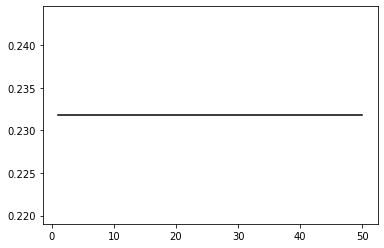

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, 50], [dt_stump_err] * 2, "k-", label="Decision Stump Error")
# Biểu đồ lỗi dự đoán ban đầu

In [47]:
# Đưa vào tập train và test để biểu diễn lỗi
from sklearn.metrics import zero_one_loss

ada_train_error = np.zeros((50,), dtype=np.float64)
for i, y_pred in enumerate(modelLetter.staged_predict(X_train)):
    ada_train_error[i] = zero_one_loss(y_pred, y_train)
    
test_score = np.zeros((50,), dtype=np.float64)
for i, y_pred in enumerate(modelLetter.staged_predict(X_test)):
    test_score[i] = zero_one_loss(y_test, y_pred)



C:\Users\phant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\phant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


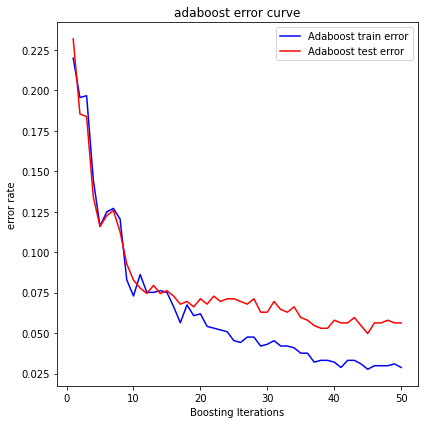

In [48]:
# Biểu diễn đường cong lỗi
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("adaboost error curve")

plt.plot(
    np.arange(50) + 1,
    ada_train_error,
    "b-",
    label="Adaboost train error",
)

plt.plot(
    np.arange(50) + 1, test_score, "r-", label="Adaboost test error"
)

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("error rate")
fig.tight_layout()
plt.show()